In [1]:
import sys
import os
from glob import glob

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("ECCOv4-py")
import ecco_v4_py as ecco
from ecco_download import *

In [2]:
geom_fp = 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc'
xds_geom = xr.open_dataset(geom_fp)

get_basin_name:  ['med'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['atl', 'mexico', 'hudson', 'med', 'north', 'baffin', 'gin'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
s

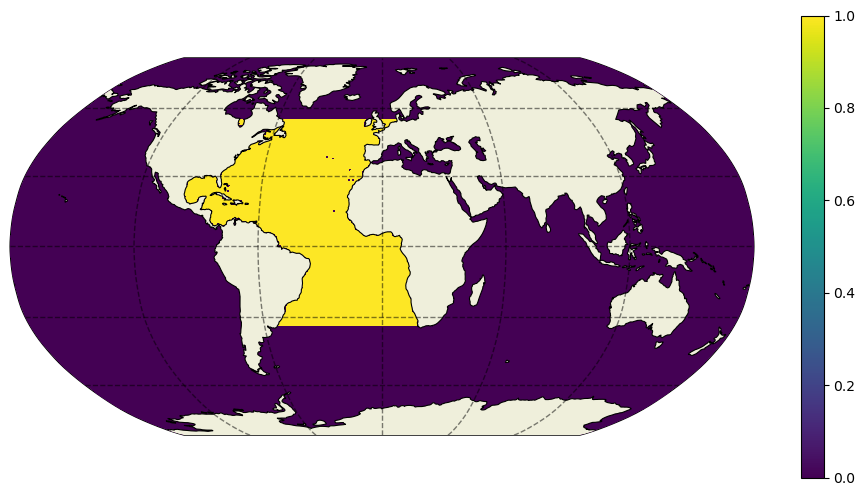

In [48]:
# Get array of 1's at and north of latitude
max_lat = 55
min_lat = -34
ones = xr.ones_like(xds_geom.YC)

dome_maskC = ones.where((xds_geom.YC >= min_lat), 0).where((max_lat >= xds_geom.YC), 0).compute()
med_mask = ecco.get_basin_mask(basin_name = 'med', mask = xr.ones_like(xds_geom.YC))
full_mask = np.logical_and(dome_maskC, np.logical_not(med_mask)).astype(int)

atl_mask = ecco.get_basin_mask(basin_name = 'atlExt', mask = full_mask)

plt.figure(figsize=(12,6))
ecco.plot_proj_to_latlon_grid(xds_geom.XC,xds_geom.YC,atl_mask,
                              projection_type='robin',cmap='viridis',user_lon_0=0,show_colorbar=True);

In [47]:
dome_maskC.sum()

<xarray.DataArray 'YC' ()>
array(0., dtype=float32)

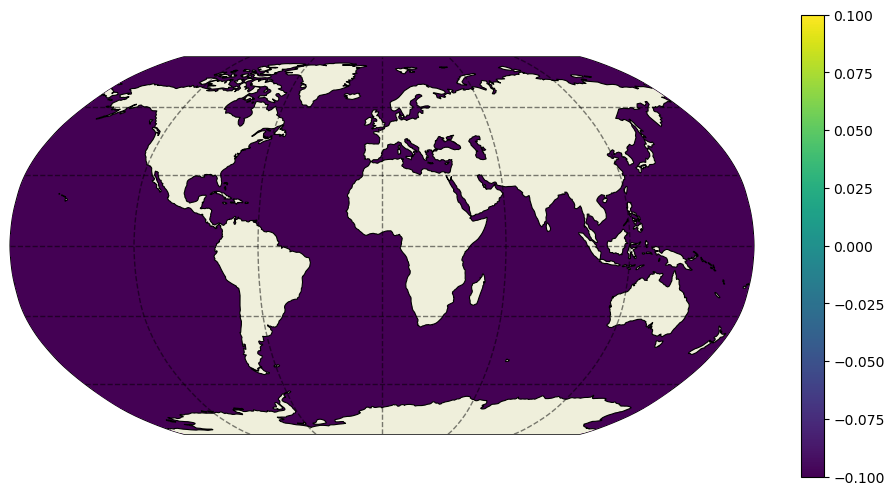

In [45]:
plt.figure(figsize=(12,6))
ecco.plot_proj_to_latlon_grid(xds_geom.XC,xds_geom.YC,dome_maskC,
                              projection_type='robin',cmap='viridis',user_lon_0=0,show_colorbar=True);

In [55]:
ones = xr.ones_like(xds_geom.YC)
southern = ones.where(min_lat >= xds_geom.YC, 0).compute()
all_oceans = ecco.get_basin_mask(ecco.get_available_basin_names(), mask = southern)

get_basin_name:  ['pac', 'atl', 'ind', 'arct', 'bering', 'southChina', 'mexico', 'okhotsk', 'hudson', 'med', 'java', 'north', 'japan', 'timor', 'eastChina', 'red', 'gulf', 'baffin', 'gin', 'barents'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)


In [56]:
new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

new_grid_lon_centers, new_grid_lat_centers, \
new_grid_lon_edges, new_grid_lat_edges, \
field_nearest_1deg = ecco.resample_to_latlon(xds_geom.XC, 
                                             xds_geom.YC, 
                                             all_oceans,
                                             new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                             new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                             fill_value = np.NaN, 
                                             mapping_method = 'nearest_neighbor',
                                             radius_of_influence = 120000)

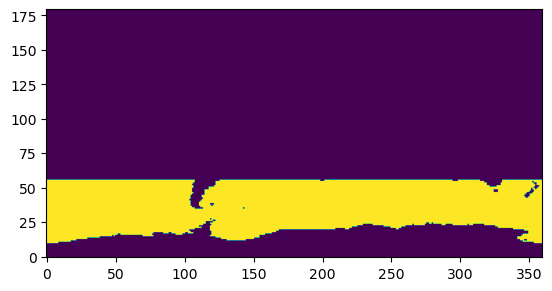

In [57]:
plt.imshow(field_nearest_1deg, origin = 'lower')

In [16]:
new_grid_lon_centers

array([[-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       ...,
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5]])

---

In [58]:
from utils import get_basin_solodoch

In [89]:
geom_fp = 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc'

atlantic = get_basin_solodoch('atlantic', geom_fp)

get_basin_name:  ['pac', 'atl', 'ind', 'arct', 'bering', 'southChina', 'mexico', 'okhotsk', 'hudson', 'med', 'java', 'north', 'japan', 'timor', 'eastChina', 'red', 'gulf', 'baffin', 'gin', 'barents'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['med'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: d

In [90]:
new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

new_grid_lon_centers, new_grid_lat_centers, \
new_grid_lon_edges, new_grid_lat_edges, \
field_nearest_1deg = ecco.resample_to_latlon(xds_geom.XC, 
                                             xds_geom.YC, 
                                             atlantic,
                                             new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                             new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                             fill_value = None, 
                                             mapping_method = 'nearest_neighbor',
                                             radius_of_influence = 120000)

In [151]:
avail_lats = new_grid_lat_centers[ : , 0]
query_lat = 27

closest_index = np.argmin(np.abs(avail_lats - query_lat))
avail_lats[closest_index]

26.5

In [ ]:
all_three_basins = get_basin_solodoch('indo-pacific', geom_fp) + (2 * get_basin_solodoch('southern', geom_fp)) + (3 * get_basin_solodoch('atlantic', geom_fp))

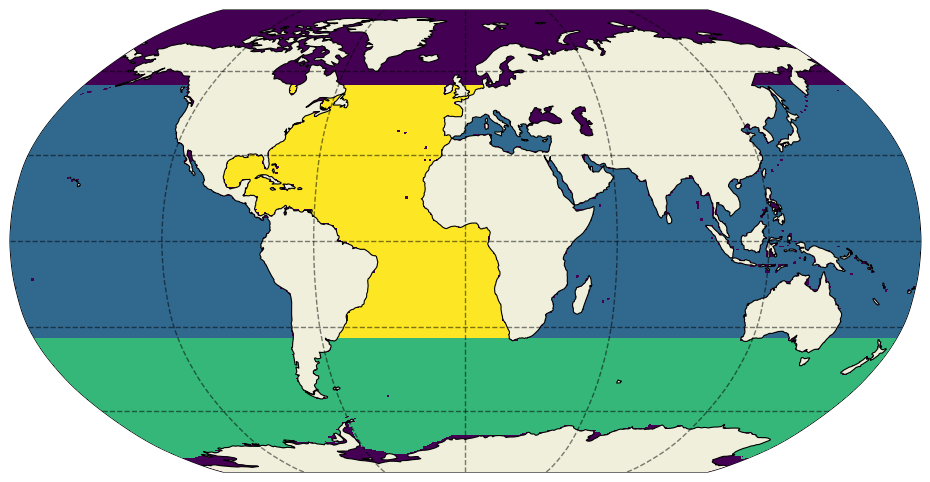

In [143]:
plt.figure(figsize=(12, 6))
ecco.plot_proj_to_latlon_grid(xds_geom.XC,xds_geom.YC,all_three_basins,projection_type='robin',cmap='viridis',user_lon_0=0,show_colorbar=False)

plt.scatter([20.5, 20.5], [-96.5, -16.5], s = 100)